# Logistic Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
X,y = make_blobs(n_samples=1000,centers=2,random_state=0)

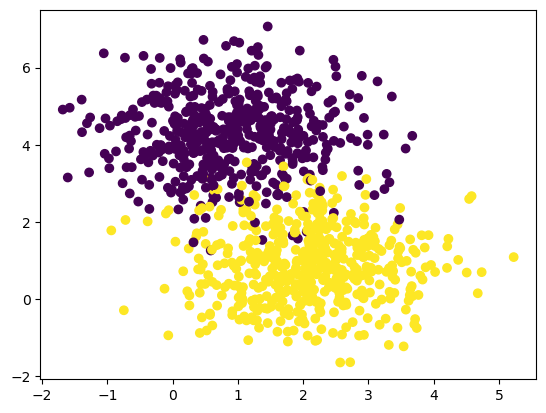

In [34]:
plt.scatter(X[:,0],X[:,1],c=y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train,y_train)

LogisticRegression()

In [38]:
model.score(X_test,y_test)

0.9606060606060606

# Custom Logistic Regression

In [39]:
class CustomLogisticRegression:
    def __init__(self,lr=0.1,iters=20):
        self.__lr = lr
        self.__iters= iters
        
    def fit(self, X, y):
        
        self.__y = y.reshape(-1, 1)
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        self.__X = X_mod
        
        self.__theta = np.zeros([X_mod.shape[1], 1])
        
        err = []
        for i in range(self.__iters):
            err.append(self.error())
            self.gradient_accend()
            
        self.theta_ = self.__theta 
        
    def gradient_accend(self):
        delta_theta = self.gradient()
        self.__theta += delta_theta
        
    def gradient(self):
        yh = self.hypothesis(self.__X)
        ya = self.__y
        diff = (ya - yh)      
        return np.dot(self.__X.T, diff) * self.__lr 
    def hypothesis(self, X):
        prod = np.dot(X, self.__theta)
        clipped_prod = np.clip(prod, -500, 500)
        return 1 / (1 + np.exp(-clipped_prod))
        
    def error(self):
        yh = self.hypothesis(self.__X)
        ya = self.__y
        ll = ya*np.log(yh) + (1-ya)*np.log(1-yh)
        return -np.mean(ll)
    
    def predict(self, X):
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        yh = self.hypothesis(X_mod)
        
        return (yh > .5).astype(int).flatten()
    
    def score(self, X, y):
        yp = self.predict(X)
        return np.mean(yp == y)

In [40]:
model = CustomLogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\Users\91771\AppData\Local\Temp\ipykernel_19504\2484774478.py:40: RuntimeWarning: divide by zero encountered in log
  ll = ya*np.log(yh) + (1-ya)*np.log(1-yh)
C:\Users\91771\AppData\Local\Temp\ipykernel_19504\2484774478.py:40: RuntimeWarning: invalid value encountered in multiply
  ll = ya*np.log(yh) + (1-ya)*np.log(1-yh)


0.8181818181818182